In [1]:
import numpy as np
import pandas as pd
import itertools
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import cohen_kappa_score


In [2]:
survey_data_youtube = pd.read_csv("../data/evaluation/Major project evaluation form (YouTube data).csv")
survey_data_bing = pd.read_csv("../data/evaluation/Major project evaluation form (Bing data).csv")
survey_data_flickr = pd.read_csv("../data/evaluation/Major project evaluation form (Flickr data).csv")
survey_data_wiki = pd.read_csv("../data/evaluation/Major project evaluation form (Wikipedia).csv")


In [3]:
## to remove the empty space and \n character before and after the text
for i in range(7,12):
    survey_data_flickr.iloc[:, i] = survey_data_flickr.iloc[:, i].apply(lambda x: x.strip())
dataframes = [survey_data_youtube, survey_data_bing, survey_data_flickr]
survey_data = pd.concat(dataframes)

df = survey_data.copy()
df.head()

In [19]:
mapping = {
    "Option 1" : 1,
    "Option1" : 1,
    "Option 2" : 2,
    "2" : 2,
    "Option 3" : 3,
    "Option 4" : 4,
    "None of above" : 5,
}

for i in range(7,12):
    df.iloc[:, i] = df.iloc[:, i].map(mapping)

In [57]:
df.to_csv("../data/evaluation/evaluation_survey_result_combined.csv")

### Calculating cohen kapp score

In [62]:
cohen_score = []
for i in range(df.shape[0]):
    for j in range(df.shape[0]):
        
        if i!=j and j>i:
#             print(i,j)
            rater1 = list(df.iloc[i, 2:])
            rater2 = list(df.iloc[j, 2:])
            chs = cohen_kappa_score(rater1, rater2)
            cohen_score.append(chs)
np_cohen_score = np.array(cohen_score)
print("Cohen kappa scoe::", n.mean())

Cohen kappa scoe:: 0.14417808870366175


In [68]:
ratings_transformed_image = df.iloc[:, 2:7] 
ratings = []
ratings.append([list(ratings_transformed_image.iloc[:,i]) for i in range(5)])
ratings = ratings[0]
ratings_list = list(itertools.chain.from_iterable(ratings))


### Survey analysis 1 - Distribution of ratings of an image


/home/abhiyush/anaconda3/envs/mq/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


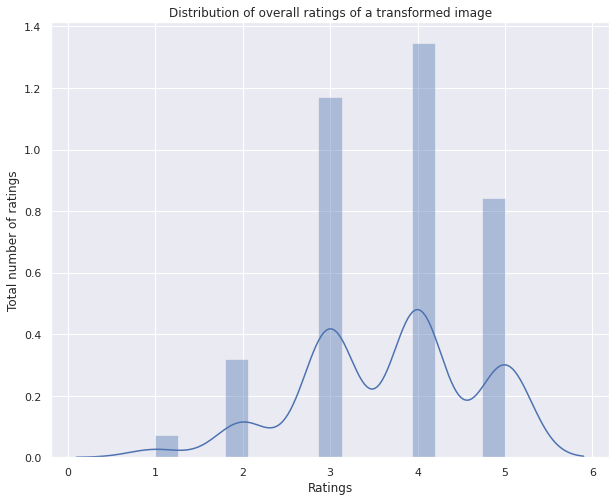

In [69]:
sns.set_theme()
fig, ax = plt.subplots(figsize = (10,8))
fig = sns.distplot(ratings_list, axlabel="Ratings")
plt.xlabel("Ratings")
plt.ylabel("Total number of ratings")
plt.title("Distribution of overall ratings of a transformed image")
plt.show(fig)
ax.figure.savefig("../evaluation/evaluation_survey_results_analysis/distribution_of_ratings.png")

### Survey_analysis 2


In [70]:
select_df = df.iloc[:, 7:12]
for i in range(len(select_df.columns)):
    select_df.iloc[:, i] = select_df.iloc[:, i].map(mapping)

In [71]:
df_attributes_summary = pd.DataFrame({
      "name" : select_df.columns,
        "correct_option_position" : [2,3,3,5,3], 
        "subplots" : ["ax1", "ax2", "ax3", "ax4", "ax5"],
        "chart_name" : ['Black hair', "Blonde hair", "Brown hair", "Fake image correctly identified", 
                       "Original image correctly identified"],
        "serial_no" : [0,1,2,3,4]})

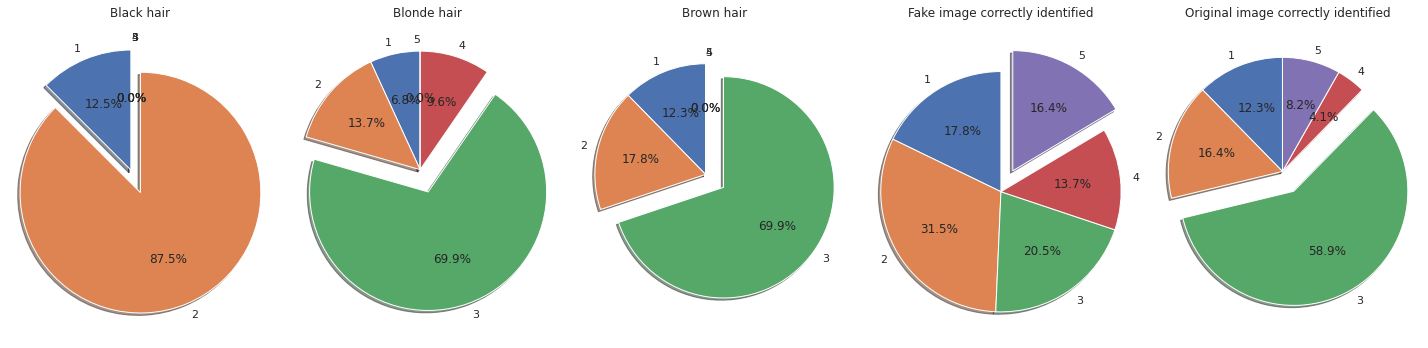

In [72]:
def plot_pie():
    respondents_percentage_correct_option = []
    
    fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(ncols=5, figsize = (20,5))

    for index,row in df_attributes_summary.iterrows():
#         print(row['name'])
#         print(row['correct_option_position'])
#         print(row['subplots'])

        survey_data = select_df[row['name']]
        labels = list(survey_data.unique())
        labels.sort()
        percentage = survey_data.value_counts(normalize = True).mul(100).round(4).sort_index()
#         percentage = percentage.reindex(list(range(percentage.index.min(),5+1)),fill_value=0)
        percentage = percentage.reindex(list(range(1,5+1)),fill_value=0)
        percentage = list(percentage)

        correct_option_location = row['correct_option_position']
        labels = [1,2,3,4,5]
#         print(labels)
#         print(percentage)
        sizes = percentage
        explode = np.zeros(len(labels))  # only "explode" the 2nd slice 
        explode_location = labels.index(correct_option_location)
        explode[explode_location] = 0.2
        colors = ['Red', 'blue', 'yellow', 'purple', 'orange']
        colors[explode_location] = "green"
        
        respondents_percentage_correct_option.append(percentage[correct_option_location-1])
#         print(explode)

        eval(row['subplots']).pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
                shadow=True, startangle=90)
        eval(row['subplots']).axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
        eval(row['subplots']).title.set_text(row['chart_name'])
    
    plt.tight_layout()
    plt.show()
    fig.savefig("../evaluation/evaluation_survey_results_analysis/pie_chart.png")
    return respondents_percentage_correct_option
respondents_percentage_correct_option = plot_pie()

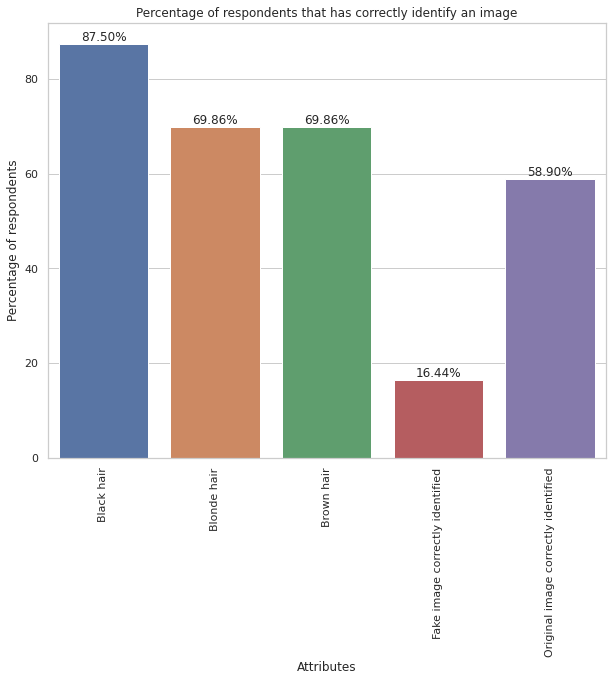

In [73]:
labels = ['Black hair', "Blonde hair", "Brown hair", "Fake image correctly identified", 
                       "Original image correctly identified"]
y = respondents_percentage_correct_option


sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize = (10,8))

fig = sns.barplot(x=labels, y=respondents_percentage_correct_option)
fig.set_xticklabels(labels, rotation=90)
plt.xlabel("Attributes")
plt.ylabel("Percentage of respondents")
plt.title("Percentage of respondents that has correctly identify an image")
for p, ratings in zip(fig.patches, y):
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 0.7,
            '{:1.2f}%'.format(ratings),
            ha="center") 
plt.show(fig)
fig.figure.savefig("../evaluation/evaluation_survey_results_analysis/percentage_of_respondents_accurately_identifying_image.png")

In [74]:
percentage_accurately_identifying_correct_image_df = pd.DataFrame({
    "attributes_name" : ["Black hair", "Brown hair", "Blonde hair", "Fake image correctly identified", 
                         "Original image correctly identified"],
    "respondents_percentages" : respondents_percentage_correct_option

})

In [75]:
percentage_accurately_identifying_correct_image_df

,attributes_name,respondents_percentages
0,Black hair,87.5000
1,Brown hair,69.8630
2,Blonde hair,69.8630
3,Fake image correctly identified,16.4384
4,Original image correctly identified,58.9041


### Survey analysis 3 - Visual representation of ratings for each attributes

In [76]:
df.head()

,Timestamp,Username,1) Rate the below set of transformed images on a scale of 1 to 5. (Note: 1 -> Lowest and 5 - >Highest),2) Rate the below set of transformed images on a scale of 1 to 5. (Note: 1 -> Lowest and 5 - >Highest),3) Rate the below set of transformed images on a scale of 1 to 5.,4) Rate the below set of transformed images on a scale of 1 to 5.,5) Rate the below set of transformed images on a scale of 1 to 5.,6) Select the transformed image (Black Hair).,7) Select the transformed image (Blonde Hair).,8) Select the transformed image (Brown Hair).,9) Select the original image,10) Select the original image,11) Rate the below set of images for the quality of Black Hair transformation. (Note: 1 -> Lowest and 5 - >Highest),12) Rate the below set of images for the quality of Blonde Hair transformation. (Note: 1 -> Lowest and 5 - >Highest),13) Rate the below set of images for the quality of Brown Hair transformation.,14) Rate the below set of images for the quality of Gender transformation.,15) Rate the below set of images for the quality of Age transformation. (Note: 1 -> Lowest and 5 - >Highest)
0,2020/10/29 6:21:22 pm GMT+11,suren.980@gmail.com,5,3,4,3,4,Option 2,Option 1,Option 2,Option 2,Option 2,5,4,2,4,3
1,2020/10/29 6:46:26 pm GMT+11,prekshyabasnet3@gmail.com,2,2,2,3,3,Option 2,Option 3,Option 3,None of above,Option 3,4,4,2,2,3
2,2020/10/29 10:43:08 pm GMT+11,sanishbyanj39@gmail.com,3,2,2,3,2,Option 2,Option 2,Option 3,Option 2,None of above,2,3,3,4,3
3,2020/10/29 10:45:50 pm GMT+11,maharjansandhya11@gmail.com,3,2,4,3,3,Option 2,Option 3,Option 2,Option 2,Option 3,2,3,2,2,1
4,2020/10/29 11:53:10 pm GMT+11,manishashr59@gmail.com,5,4,4,3,3,Option 1,Option 2,Option 3,Option 2,Option 3,4,3,3,2,2


In [77]:
rating_single_attributes = df.iloc[:, 12:]

In [78]:
rating_single_attributes

,11) Rate the below set of images for the quality of Black Hair transformation. (Note: 1 -> Lowest and 5 - >Highest),12) Rate the below set of images for the quality of Blonde Hair transformation. (Note: 1 -> Lowest and 5 - >Highest),13) Rate the below set of images for the quality of Brown Hair transformation.,14) Rate the below set of images for the quality of Gender transformation.,15) Rate the below set of images for the quality of Age transformation. (Note: 1 -> Lowest and 5 - >Highest)
0,5,4,2,4,3
1,4,4,2,2,3
2,2,3,3,4,3
3,2,3,2,2,1
4,4,3,3,2,2
...,...,...,...,...,...
26,1,1,2,1,3
27,2,3,1,2,4
28,4,4,4,1,2
29,5,5,4,4,5


In [79]:
def bar_chart_single_attributes(attribute_name, serial_number):
    attributes_rating = rating_single_attributes.iloc[:, serial_number].value_counts(normalize = True).mul(100).sort_index()
    attributes_rating = attributes_rating.reindex(list(range(1,5+1)),fill_value=0)

    # sns.set_theme(style="whitegrid")
    fig, ax = plt.subplots(figsize = (10,8))

    ax = sns.barplot(x = attributes_rating.index, y = attributes_rating.values)
    # ax1.axis("equal")
    for p, ratings in zip(fig.patches, attributes_rating.values):
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 0.7,
                '{:1.2f}%'.format(ratings),
                ha="center") 

    plt.xlabel("ratings")
    plt.ylabel("Percentage of respondents")
    plt.title("Percentage of respondents giving ratings for black")# + attributes_name)
    plt.show(fig)
    image_name = attribute_name +"_ratings"+".png"
    print(image_name)
    ax.figure.savefig("../evaluation/evaluation_survey_results_analysis/" + image_name)


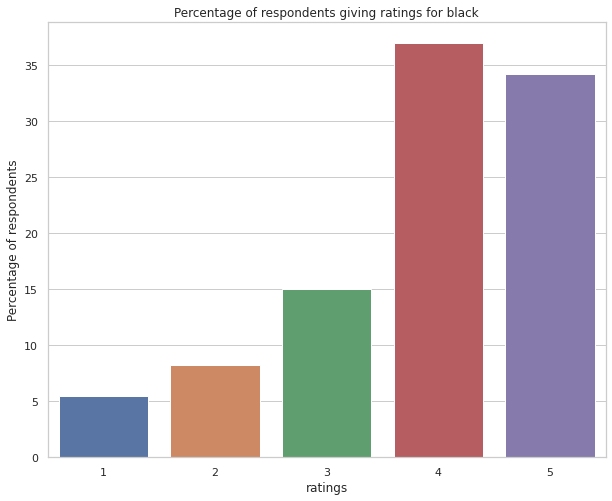

Black_hair_transformation_ratings.png


In [80]:
bar_chart_single_attributes("Black_hair_transformation", 0)    

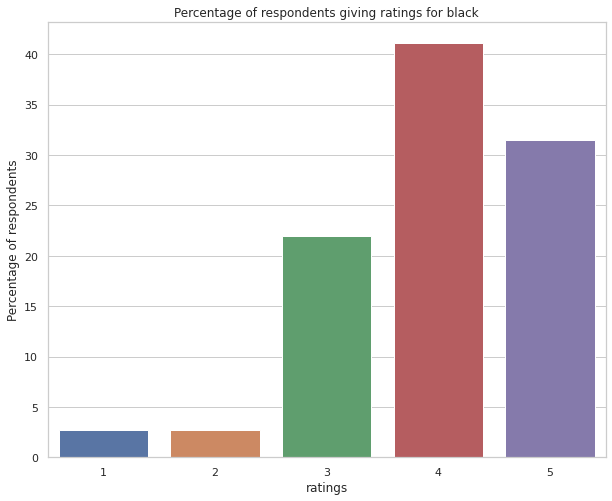

Brown_hair_transformation_ratings.png


In [81]:
bar_chart_single_attributes("Brown_hair_transformation", 1)    

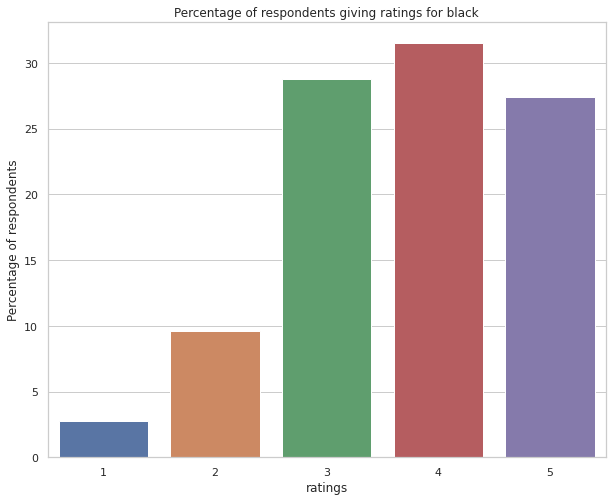

Blonde_hair_transformation_ratings.png


In [82]:
bar_chart_single_attributes("Blonde_hair_transformation", 2)    

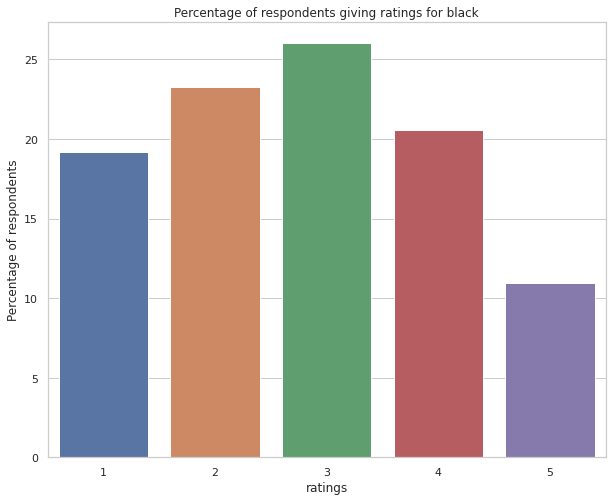

Gender_transformation_ratings.png


In [83]:
bar_chart_single_attributes("Gender_transformation", 3)    

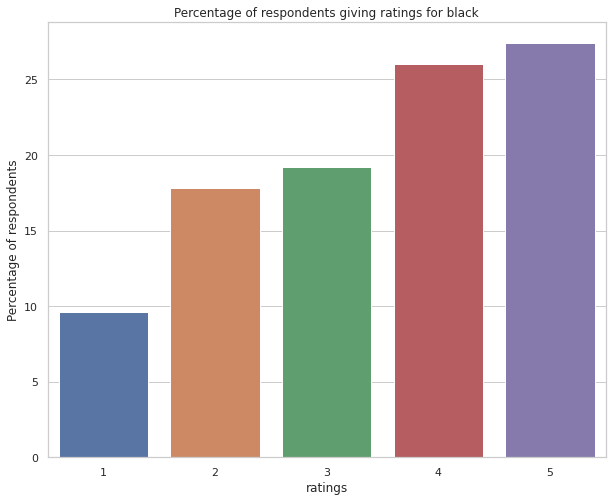

Age_transformation_ratings.png


In [84]:
bar_chart_single_attributes("Age_transformation", 4)    

### Average ratings for each attributes

In [85]:
rating_single_attributes

,11) Rate the below set of images for the quality of Black Hair transformation. (Note: 1 -> Lowest and 5 - >Highest),12) Rate the below set of images for the quality of Blonde Hair transformation. (Note: 1 -> Lowest and 5 - >Highest),13) Rate the below set of images for the quality of Brown Hair transformation.,14) Rate the below set of images for the quality of Gender transformation.,15) Rate the below set of images for the quality of Age transformation. (Note: 1 -> Lowest and 5 - >Highest)
0,5,4,2,4,3
1,4,4,2,2,3
2,2,3,3,4,3
3,2,3,2,2,1
4,4,3,3,2,2
...,...,...,...,...,...
26,1,1,2,1,3
27,2,3,1,2,4
28,4,4,4,1,2
29,5,5,4,4,5


In [86]:
average_ratings

[]

In [87]:
average_ratings = []
attributes_names = ["Black hair", "Brown hair", "Blonde hair", "Gender", "Age"]
for i in range(len(rating_single_attributes.columns)):
    rating_counts = rating_single_attributes.iloc[:, i].value_counts().sort_index()
    rating_counts= rating_counts.reindex(list(range(1,5+1)),fill_value=0)
    average_ratings.append(np.sum(rating_counts.index * rating_counts.values) / np.sum(rating_counts.values))
    
average_rating_df = pd.DataFrame({
    "attributes_name" : attributes_names,
    "average_rating" : average_ratings
})

average_rating_df

,attributes_name,average_rating
0,Black hair,3.863014
1,Brown hair,3.958904
2,Blonde hair,3.712329
3,Gender,2.808219
4,Age,3.438356
